## Goals of Linear Regression
Linear regression is powerful technique that is often used to understand whether and how certain *predictor variables* (e.g., garage size, year built, etc.) in a dataset (linearly) relate to some *target variable* (e.g., sale prices). By modeling these relationships in the housing data, we can:

1. **Explain**: Use *statistics* to make scientific claims concerning which predictor variables have the greatest impact on sale price — the target variable 
2. **Predict**: Use *predictive modeling* to predict hypothetical/future sale prices based on observed values of the predictor variables in our dataset (e.g., garage size, year built, etc.). 

In this lesson, we will explore how we can exploit well-established machine learning methods, including "multivariate regression" and "regularization techniques" (more on these terms later), to achieve both of the above goals. 

#### Predict Versus Explain: Which is more important?
In a research setting, goal #1 (explain) typically takes higher priority over goal #2 (predict) since explainations hold high value in science, but both goals are sometimes relevant. In industry, the reverse is typically true as many industry applications place predictive accuracy above explainability. We will explore how these goals align and sometimes diverge from one another throughout this lesson.

## Walk Before Running: Univariate linear regression
Before we turn our attention towards modeling high-dimensional datasets, let's first review a few basic concepts from univariate linear modeling. The classic equation for a univariate linear regression model is shown below.

$$y = mx + b$$

where...

* $y$ = observed values of the target variable / dependent variable / response variable
* $x$ = observed values of the predictor variable / model feature / independent variable / explanatory variable
* $m$ = regression slope / predictor coefficient
* $b$ = y-intercept

**Note**: It is common in the field of machine learning — which is itself a combination of several fields (math, statistics, computer science) — to use multiple terms interchangeably for a given concept. Note the above synonyms for the target and predictor variable terms — you'll encounter these synonyms across other readings and materials.


### Example using Ames housing data
Let's load in the Ames housing data and fit a univariate regression model using "YearBuilt" as our single predictor variable. 

#### 1) Load the data
We'll start by loading in the data as we have in the previous section.

In [1]:
## Ames housing dataset. 

# See here for thorough documentation regarding the feature set: 
# https://www.openml.org/d/42165
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

##### Reminder of basic data properties
1. How many observations and features are there in the data? 
2. What are some of the features available?
3. What is the name of the target feature?

In [2]:
print(f"housing['data'].shape = {housing['data'].shape}\n") # 80 features total, 1460 observations
print(f"housing['feature_names'] = {housing['feature_names']}\n")
print(f"housing['target_names'] = {housing['target_names']}\n")

housing['data'].shape = (1460, 80)

housing['feature_names'] = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

#### 2) Extract predictor variable and target variable from dataframe
Next, we'll extract the two variables we'll use for our model — the target variable that we'll attempt to predict (SalePrice), and the predictor variable (YearBuilt) that will be used to predict the target variable.

In [3]:
# Extract x (single predictor variable = YearBuilt) and y (target variable = SalePrice)
x=housing['data']['YearBuilt']
y=housing['target']

#### 3) Train/test split
Say something about train/test sets, and purpose of each. Define overfitting.

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=0)

# reshape single-var predictor matrix in preparation for model-fitting step (requires single column vectors to have 1 column rather than zero)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(type(y_train))
print(type(x_train))

(978, 1)
(482, 1)
(978,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


#### 4) Fit the model to the training dataset

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)

#### 5) Get model predictions for train and test data

In [6]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

#### 6) Plot the data vs predictions - qualitative assessment


In [7]:
import matplotlib.pyplot as plt
def plot_model_predictions(
        x_train, y_pred_train, 
        x_test, y_pred_test, 
        train_err=None, test_err=None):
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('Model Fit')

    # train set
    ax1.scatter(x_train, y_train, alpha=.1) 
    ax1.plot(x_train, y_pred_train, color='k') 
    if train_err is not None:
        ax1.title.set_text('Train Set Error = ' + str(train_err))
    else:
        ax1.title.set_text('Train Data')

    # test set
    ax2.scatter(x_test, y_test, alpha=.1) 
    ax2.plot(x_test, y_pred_test, color='k') 
    # ax2.yticklabels('')
    ax2.axes.get_yaxis().set_ticklabels([]);
    if test_err is not None:
        ax2.title.set_text('Test Set Error = ' + str(test_err))
    else:
        ax2.title.set_text('Test Data')


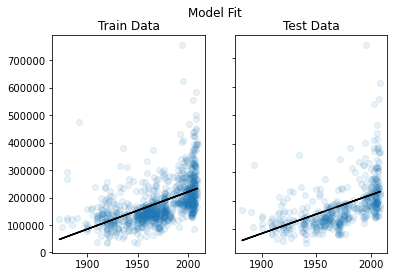

In [8]:
plot_model_predictions(x_train, y_pred_train, x_test, y_pred_test)

#### 5) Measure model error and assess under/overfitting

In [9]:
from sklearn import metrics

RMSE_train = metrics.mean_squared_error(y_train,y_pred_train,squared=False) 
RMSE_test = metrics.mean_squared_error(y_test,y_pred_test,squared=False) 

print(f"Train RMSE = {RMSE_train}")
print(f"Test RMSE = {RMSE_test}")

Train RMSE = 67500.86657586123
Test RMSE = 68106.22257848026


##### Root Mean Squared Error (RMSE)
The RMSE provides an easy-to-interpret number that represents error in terms of the units of the target variable. With our univariate model, the "YearBuilt" predictor variable (a.k.a. model feature) predicts sale prices within +/- $68,106 from the true sale price. We always use the RMSE of the test set to assess the model's ability to generalize on unseen data, while the train set RMSE helps us detect "overfitting".

##### Mean Absolute Percentage Error
What if we wanted to know the percent difference between the true sale price and the predicted sale price? For this, we can use the **mean absolute percentage error (MAPE)**...

In [10]:
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_pred_train) 
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_pred_test) 
print(f"Train MAPE = {MAPE_train}")
print(f"Test MAPE = {MAPE_test}")

Train MAPE = 0.2869562321419441
Test MAPE = 0.2705162463887326


With the MAPE measurement (max value of 1 which corresponds to 100%), we can state that our model over/under estimates sale prices by an average of 27.1% (28.7%) across all houses included in the test set (train set). Certainly seems there is room for improvement based on this measure.

##### R-Squared 
Another useful error measurement to use with regression models is the coefficient of determination — $R^2$. Oftentimes pronounced simply "R-squared",  this measure assesses the proportion of the variation in the target variable that is predictable from the predictor variable(s). Using sklearn's metrics, we can calculate this as follows:

In [11]:
R2_train = metrics.r2_score(y_train, y_pred_train) 
R2_test = metrics.r2_score(y_test, y_pred_test) 
print(f"Train R-squared = {MAPE_train}")
print(f"Test R-squared = {MAPE_test}")


Train R-squared = 0.2869562321419441
Test R-squared = 0.2705162463887326


Our model predicts 27.1% (28.7%) of the variance across sale prices in the test set (train set).

To read more about additional error/loss measurements, visit [sklearn's metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

### Exercise — More on R-squared
Some of the below is paraphrased from (make sure to go back and reword in own words -- use different examples at least): https://www.statology.org/good-r-squared-value
 
R-squared is a measure of how well a linear regression model “fits” a dataset (i.e., the proportion of the variance in the response variable that can be explained by the predictor variable(s)).

The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable. In practice, you will likely never see a value of 0 or 1 for R-squared. Instead, you’ll likely encounter some value between 0 and 1. ""

Our above example model is able to explain roughly 27% of the variance in the test dataset. Is this a “good” value for R-squared?

The answer to this question depends on your objective for the regression model. This relates back to the two tangentially related goals of **explaining** vs **predicting**, namely:
    
1. Are you interested in **explaining** the relationship between the predictor(s) and the response variable?

OR

2. Are you interested in **predicting** the response variable?

Depending on the objective, the answer to “What is a good value for R-squared?” will be different.

#### Explaining the Relationship Between the Predictor(s) and the Response Variable
If your main objective for your regression model is to explain the relationship between the predictor(s) and the response variable, the R-squared is mostly irrelevant. A predictor variable that consistently relates to a change in the response variable is typically always interesting — regardless of the the effect size. 

For example, suppose in the regression example from above, you see that the coefficient  for the predictor population size is 0.005 and that it’s statistically significant. This means that an increase of one in population size is associated with an average increase of 0.005 in the number of flower shops in a particular city. Also, population size is a statistically significant predictor of the number of flower shops in a city.

Whether the R-squared value for this regression model is 0.2 or 0.9 doesn’t change this interpretation. Since you are simply interested in the relationship between population size and the number of flower shops, you don’t have to be overly concerned with the R-square value of the model.

#### Predicting the Response Variable
If your main objective is to predict the value of the response variable accurately using the predictor variable, then R-squared is important.

In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable.

How high an R-squared value needs to be depends on how precise you need to be. For example, in scientific studies, the R-squared may need to be above 0.95 for a regression model to be considered reliable. In other domains, an R-squared of just 0.3 may be sufficient if there is extreme variability in the dataset.

To find out what is considered a “good” R-squared value, you will need to explore what R-squared values are generally accepted in your particular field of study. If you’re performing a regression analysis for a client or a company, you may be able to ask them what is considered an acceptable R-squared value."

#### 7) Explaining Model Predictions Using Statistics 
At this point, we have assessed the predictive accuracy of our model. However, what if we want to make scientific claims regarding how impactful the 'YearBuilt' predictor variable really is on sale prices? For this kind of questio, we need to incorporate statistics. This next section will explore the assumptions required for running basic statistics on a linear regression model.

### Assumptions of Linear Regression
#### Hypothesis Testing
To run statistics on a univariate model, we start with two hypotheses — one null and one alternative.
* $H_0$ (Null hypothesis): $m$ = 0 (i.e., slope is flat)
* $H_A$ (Alternative hypothesis): $m \neq 0$ (i.e.., slope is not completely flat) 

#### The 4 Assumptions for Linear Regression Hypothesis Testing
1. Linearity: There is a linear relation between Y and X
2. Normality: The error terms (residuals) are normally distributed
3. Homoscedasticity: The variance of the error terms is constant over all X values (homoscedasticity)
4. Independence: The error terms are independent

### Frame questions to explore
In this next section, we'll explore the use of univariate linear models to both (1) explain relationships in the data, and (2) form predictions of hypothetical sale prices. Specifically, we'll answer the following questions...

1. Which predictor variable yields the most accurate prediction of sale prices?
2. Which predictor variables have a statistically significant affect on sale price?